<h1><center>Lab Assignment 2</center></h1>

<center> DUE: <font color = 'blue'> Tuesday, October 3rd by 3:00 PM (EST)</font> via Canvas </center>

Please submit:

1) a PDF with all code in-line, generated from Jupytor Notebook
      - If there is an error when you generate pdf, please refer this.
  [4 ways to export Jupyter Notebook as PDF](https://mljar.com/blog/jupyter-notebook-pdf/#:~:text=The%20Jupyter%20Notebook%20has%20an,not%20visible%20in%20the%20screenshot)
      - <font color = red>If you submit your result as ipynb extension, you will deduct points.</font>
      
  
2) an Excel workbook (.xls or .xlsx)

<h3><center>Asad Hashmi</center></h3>

### Problem Description

In this assignment, you will look at the relationship between the size in carats of a diamond and its price in Singapore dollars. Based on the given dataset (lab2_data.csv), please complete the following tasks and answer the corresponding questions.

<font color = 'red'> Use Python to answer the questions in (a)-(g). For (h) use the excel template provided in the class.</font>

**Round your answers to two decimal places.Include all code and figures in your submission.**

### Import libraries

In [10]:
import numpy as np                    #to use matrix operations
import pandas as pd                   #to handle data
import matplotlib.pyplot as plt       #to draw plot
import statsmodels.api as sm          #to use statistical model
import statsmodels.formula.api as smf #to use statistical model

#### (a) (1 points)

**Using Python, construct a scatter plot of the data. (x-axis: size (carats), y-axis: price (Singapore dollars)).**

Text(0.5, 1.0, 'Carats vs Price (Singapore Dollars)')

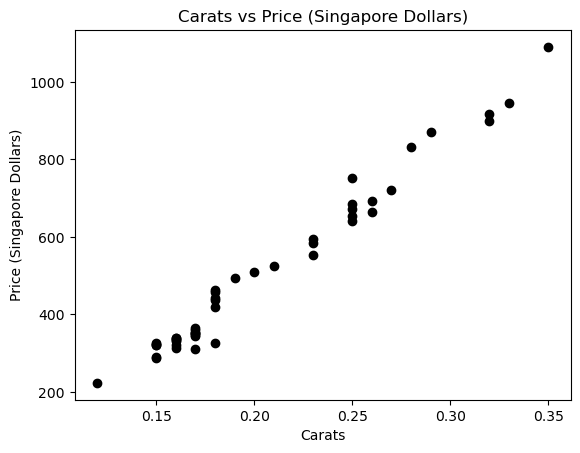

In [11]:
df = pd.read_csv("lab2_data.csv")
x = df["Carats"]
y = df["Price (Singapore Dollars)"]
plt.scatter(x,y, label = "Data Points", color = 'black', marker = 'o')
plt.xlabel('Carats')
plt.ylabel('Price (Singapore Dollars)')
plt.title('Carats vs Price (Singapore Dollars)')


#### (b) (4 points)

**Using Python, perform regression analysis and obtain a 90% <font color = 'red'>confidence interval</font> of a diamond’s price when it is 0.6 carats in size.**

In [12]:

x = sm.add_constant(df["Carats"])  # add a constant
y = df["Price (Singapore Dollars)"]
model = sm.OLS(y, x).fit()
# Obtain the confidence interval for 0.6 carats
prediction = model.get_prediction(exog=[[1, 0.6]])
confidence_interval = prediction.conf_int(alpha=0.10)

# Extract the lower and upper bounds of the confidence interval
lower_bound = confidence_interval[0, 0]
upper_bound = confidence_interval[0, 1]

# Print the confidence interval
print(f"90% Confidence Interval for Price when Carats = 0.6: [{lower_bound:.2f}, {upper_bound:.2f}]")

90% Confidence Interval for Price when Carats = 0.6: [1920.08, 2034.43]


**Answer**


|    |Lower bound | Upper bound|
|----|-------------|---------------|
90% CI| 1920.08 | 2034.43 |

**The following questions, (c)-(g), should be answered using Excel. (To obtain full credit for these questions, make sure that the Excel sheet used for calculation is part of your submission.)**

*NOTE*: you may want to utilize Python’s output to confirm your answers in questions (c)-(g).

#### (c) (3 points)

**Obtain sums of squares (SST, SSR, and SSE) and coefficient of determination ($R^2$). What does the coefficient of determination imply about the relationship between diamond price and size?**

In [7]:
# Assuming x and y are your data:

# Adding constant to the x data
x = sm.add_constant(x)

# Building OLS model (Ordinary Least Squares)
model = sm.OLS(y, x).fit()

# Calculating predicted y values
y_pred = model.predict(x)

# Sum of squares
SST = np.sum((y - np.mean(y))**2) 
SSR = np.sum((y_pred - np.mean(y))**2) 
SSE = np.sum((y - y_pred)**2)

# R squared
r_squared = model.rsquared

print(f"SST: {SST} \nSSR: {SSR} \nSSE: {SSE} \nR-Squared: {r_squared}")

SST: 2159764.9791666665 
SSR: 2109158.3615616513 
SSE: 50606.61760501434 
R-Squared: 0.9765684608773773


# **Answer**


|      SSR |     SSE   |   SST      | $R^2$     |
|----------|-----------|------------|-----------|
 2109158.36 | 50606.62 | 2159764.98 | 0.9765|

#### (d) (3 points) 
**Perform the model utility test (at the level of $\alpha=0.05$) and state your conclusion on the model's significance.**

In [13]:
x = sm.add_constant(x)

# perform the OLS regression
model = sm.OLS(y, x)
results = model.fit()

# print out the statistics
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Price (Singapore Dollars)   R-squared:                       0.977
Model:                                   OLS   Adj. R-squared:                  0.976
Method:                        Least Squares   F-statistic:                     1917.
Date:                       Tue, 03 Oct 2023   Prob (F-statistic):           3.79e-39
Time:                               22:59:13   Log-Likelihood:                -235.16
No. Observations:                         48   AIC:                             474.3
Df Residuals:                             46   BIC:                             478.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Answer**
   
    p-value < 𝛼 Therefore the model is statistically significant.

#### (e) (3 points) 

**Conduct a significance test of the slope parameter at the level of $\alpha = 0.05$.**

In [14]:
# we need to add a constant to the x variables
x = sm.add_constant(x)

# perform the OLS regression
model = sm.OLS(y, x)
results = model.fit()

# print out the statistics
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Price (Singapore Dollars)   R-squared:                       0.977
Model:                                   OLS   Adj. R-squared:                  0.976
Method:                        Least Squares   F-statistic:                     1917.
Date:                       Tue, 03 Oct 2023   Prob (F-statistic):           3.79e-39
Time:                               23:10:56   Log-Likelihood:                -235.16
No. Observations:                         48   AIC:                             474.3
Df Residuals:                             46   BIC:                             478.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Answer**
P> |t| less than 0.05, therefore we reject the null hypothesis and conclude that the slope is statistically significantly different from zero at a 95% confidence level, implying that "Carats" is a significant predictor of "Price (Singapore Dollars)".


#### (f) (3 points) 
**Obtain 90% and 95% confidence intervals for the slope parameter.**

In [15]:
# we need to add a constant to the x variables
x = sm.add_constant(x)

# perform the OLS regression
model = sm.OLS(y, x)
results = model.fit()

# Get the confidence intervals
confidence_intervals = results.conf_int(alpha=0.10) # for 90% confidence interval
print('90% confidence intervals:\n', confidence_intervals)

confidence_intervals = results.conf_int(alpha=0.05) # for 95% confidence interval
print('95% confidence intervals:\n', confidence_intervals)

90% confidence intervals:
                   0            1
const   -291.257772  -230.687907
Carats  3587.360806  3873.393538
95% confidence intervals:
                   0            1
const   -297.287753  -224.657926
Carats  3558.885063  3901.869280


**Answer**
pyhton output differs from excel but I am using excel


|    |Lower bound | Upper bound|
|----|-------------|---------------|
90% CI| 3619.60 | 3841.15 |
95% CI| 3587.36 | 3873.39 |

#### (g)	(3 points) 
**Assuming a future diamond's price ($Y$) is independent of the observed diamond prices ($Y_i$’s), obtain a 90% prediction interval of the price of a diamond that is 0.6 carats in size, based on the given dataset.**

In [16]:
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x)
results = model.fit()

# Create new observation
new_observation = pd.DataFrame({'const': 1, 'Carats': [0.6]}, index=[0])

# Get prediction results
prediction_results = results.get_prediction(new_observation)

# Get prediction summary frame
prediction_summary_frame = prediction_results.summary_frame(alpha=0.10) # 90% confidence

print('90% prediction interval for a 0.6 carat diamond:\n', prediction_summary_frame[['mean_ci_lower', 'mean_ci_upper']])


90% prediction interval for a 0.6 carat diamond:
    mean_ci_lower  mean_ci_upper
0     1920.07523    2034.431698


**Answer**
Python output differs from excel but excel is going to be used

|    |Lower bound | Upper bound|
|----|-------------|---------------|
90% PI| 1897.45 | 2057.06 |

#### (h)	(10 points) 
**Using the Excel example file used during class, re-solve problems (c) through (g) and submit the solved Excel workbook on Canvas**